In [1]:
from reservoirUtils import *
%load_ext autoreload
%autoreload 2

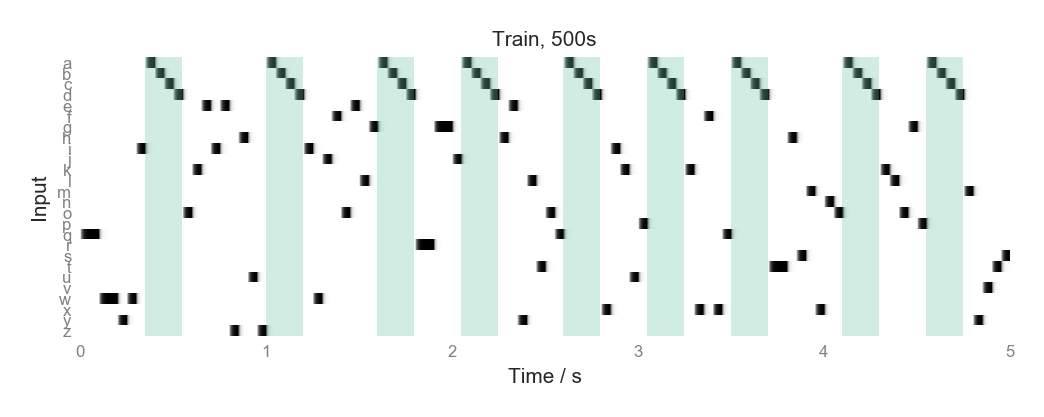

In [3]:
inputParams = defaultInputParams.copy()
inputParams['interChunkSyllables'] = alphabet[4:]
inputs = getInputs(inputParams,totalTime=500)
plotInputs(inputs,title='Train, 500s')

inputsTest = getInputs(inputParams,totalTime=10)
#plotInputs(inputsTest,title='Test, 10s')

In [4]:
hyperparams = defaultHyperparams
hyperparams['Ni'] = inputs['data'].shape[1]

Running multiple tests of reservoir:   0%|          | 0/5 [00:00<?, ?it/s]

Test 0:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 1:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 2:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 3:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 4:   0%|          | 0/10000 [00:00<?, ?it/s]

(<Figure size 1200x300 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faec1dc8ac8>)

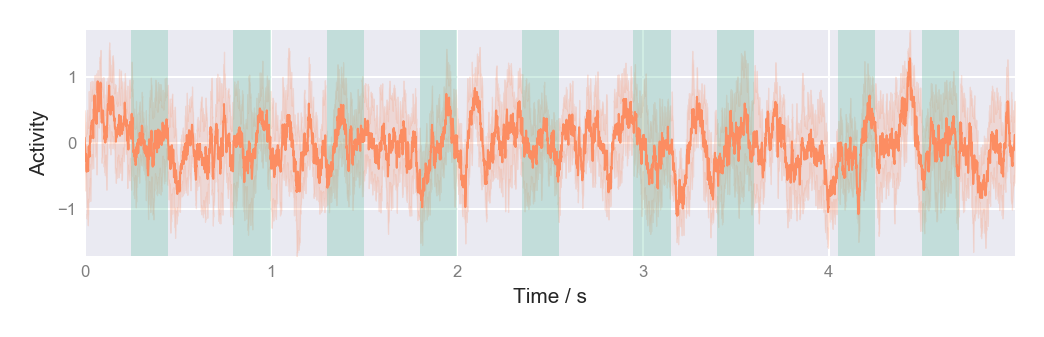

In [5]:
reservoirPair = ReservoirPair(hyperparams,inputs)
testReservoir(reservoirPair.res1, inputs=inputsTest, testName='pretraining',Ntest=5)
plotTest(reservoirPair.res1, testName='pretraining')

In [8]:
reservoirPair.trainPair(maxTrainTime=10)
testReservoir(reservoirPair.res1, inputs=inputsTest, testName='posttraining',Ntest=5)
reservoirPair.testPair(testName='posttraining',testData='test',Ntest=5,returnItems=['z','r'])

Training reservoir pair:   0%|          | 0/10000 [00:00<?, ?it/s]

Running multiple tests of reservoir:   0%|          | 0/5 [00:00<?, ?it/s]

Test 0:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 1:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 2:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 3:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 4:   0%|          | 0/10000 [00:00<?, ?it/s]

AttributeError: 'ReservoirPair' object has no attribute 'testPair'

In [ ]:
pickleAndSave(reservoirPair,'asabuki')

In [24]:
reservoirPair = loadAndDepickle('asabuki')

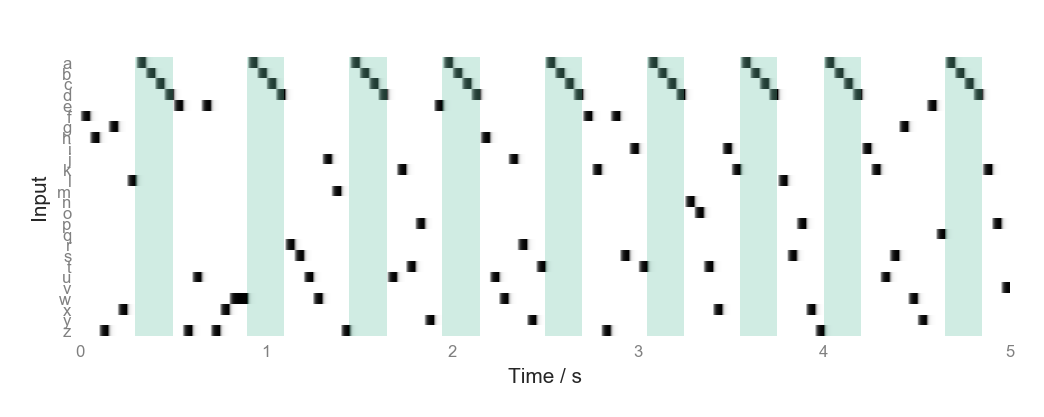

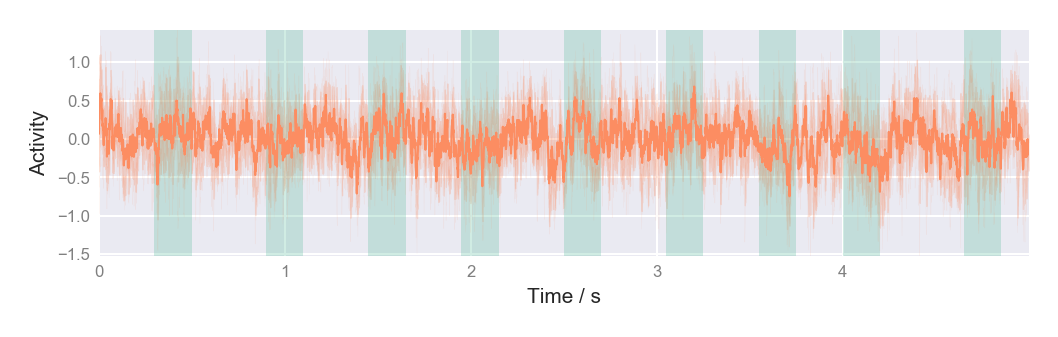

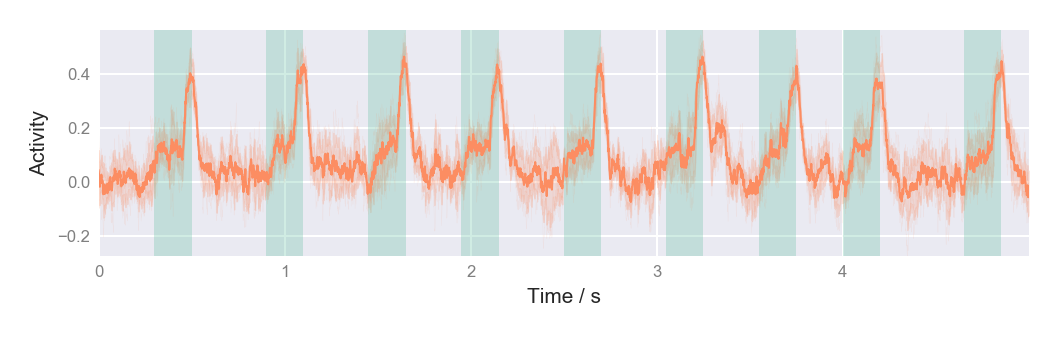

In [25]:
plotInputs(reservoirPair.inputDict['test'])
plotTest(reservoirPair,testName='pretraining',testData='test')
plotTest(reservoirPair,testName='posttraining',testData='test')

In [19]:
# test low D dynamics of reservoir on chunks 
X = reservoirPair.hist['posttraining']['r'][:,:,0].T
X = X - np.mean(X,axis=0)
XX_T = np.matmul(X.T,X)
eigenvals, eigenvecs = np.linalg.eig(XX_T)
reducedX = np.matmul(X,eigenvecs[:,:2])

writer = anim.FFMpegWriter(fps=30,bitrate=4000) 
a = AnimatedScatter(reducedX,reservoirPair.inputDict['test'],fps=30,length=5)
a.ani.save('./figures/asabuki.mp4', writer=writer,dpi=250)

In [20]:
Video("./figures/asabuki.mp4")

### Or a harder version (fewer different syllables) 

In [26]:
inputParams['syllables'] = alphabet[:8]
inputParams['interChunkSyllables'] = alphabet[:8]
inputParams['totalTime'] = 500
inputs1 = getInputs(inputParams)
#plotInputs(inputs,title='Train, 500s')

inputParams['totalTime'] = 10
inputsTest1 = getInputs(inputParams)
#plotInputs(inputsTest,title='Test, 10s')

In [28]:
hyperparams = {'Ng' : 300, #no. neurons in each reservoir 
               'n' : 150, #no. reservoir neurons the output neuron is connected to 
               'p' : 0.8, #connection probability amongst recurrent units
               'tau' : 10, #neuron time constant, in ms 
               'dt' : 1, #simulation timestep in ms
               'g_GG' : 1.5, #RNN chaos parameters ( > 1 means chaos)
               'g_Gz' : 1, #feedback strength,
               'alpha' : 100, #learning rate
               'sigma' : 0.3,#amount of network noise
               'Nz' : 1, #no. of output neurons
               'ipr' : 3,
               'Ni' : inputs1['data'].shape[1]} #no. input neurons. Must be consistent with ther inputs passed

In [29]:
reservoirPair1 = ReservoirPair(hyperparams,inputs1)
reservoirPair1.storeInputs(inputsTest1,name='test')
reservoirPair1.trainPair()
reservoirPair1.testPair(testName='posttraining',testData='test',Ntest=5)

Training reservoir pair:   0%|          | 0/500000 [00:00<?, ?it/s]

Running multiple tests of reservoir:   0%|          | 0/5 [00:00<?, ?it/s]

Test 0:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 1:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 2:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 3:   0%|          | 0/10000 [00:00<?, ?it/s]

Test 4:   0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
pickleAndSave(reservoirPair1,'asabuki2')

In [ ]:
reservoirPair1 = loadAndDepickle('asabuki2')

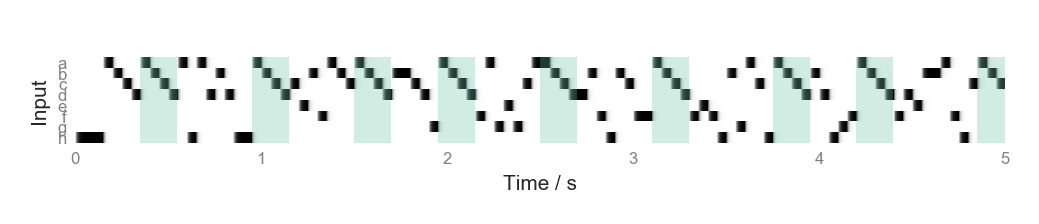

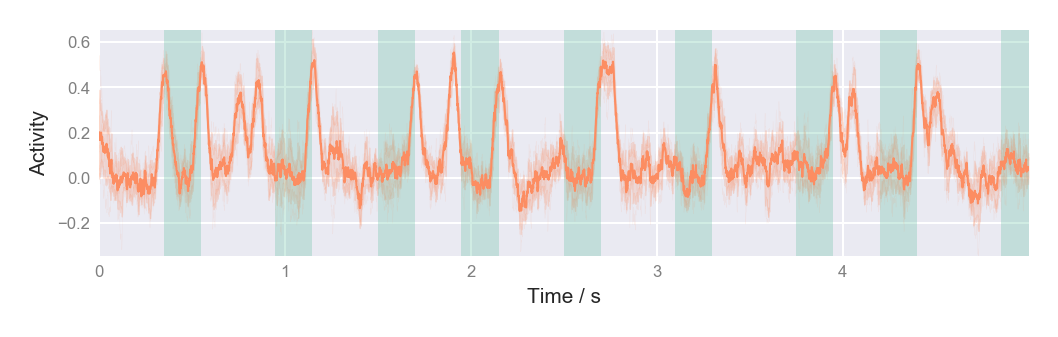

In [30]:
plotInputs(reservoirPair1.inputDict['test'])
plotTest(reservoirPair1,testName='posttraining',testData='test')

### Fig 2c & d

In [ ]:
inputParams = defaultInputParams.copy()
inputParams['chunkList'] = [['a','b','c','d'],['e','f','g','h'],['i','j','k','l']]
inputs2 = getInputs(inputParams, totalTime = 5000)
plotInputs(inputs2,title='Multiple chunks')

inputsTest2 = getInputs(inputParams, totalTime=100) 

In [ ]:
hyperparams = {'Ng' : 600, #no. neurons in each reservoir 
               'n' : 300, #no. reservoir neurons the output neuron is connected to 
               'p' : 0.5, #connection probability amongst recurrent units
               'tau' : 10, #neuron time constant, in ms 
               'dt' : 1, #simulation timestep in ms
               'g_GG' : 1.5, #RNN chaos parameters ( > 1 means chaos)
               'g_Gz' : 1, #feedback strength,
               'alpha' : 100, #learning rate
               'sigma' : 0.1,#amount of network noise
               'Nz' : 3, #no. of output neurons
               'Ni' : inputs2['data'].shape[1]}

In [ ]:
reservoirPair2 = ReservoirPair(hyperparams,inputs2)
reservoirPair2.storeInputs(inputsTest2,name='test')
reservoirPair2.trainPair()
reservoirPair2.testPair(testName='posttraining',testData='test',Ntest=10)

In [ ]:
pickleAndSave(reservoirPair2,'asabuki3_1')

In [3]:
reservoirPair2 = loadAndDepickle('asabuki3_1')

(<Figure size 1200x300 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faba32364e0>)

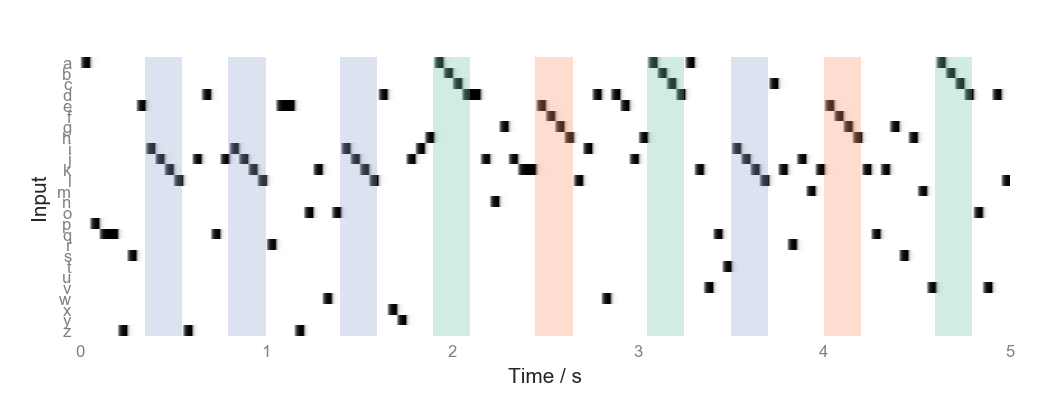

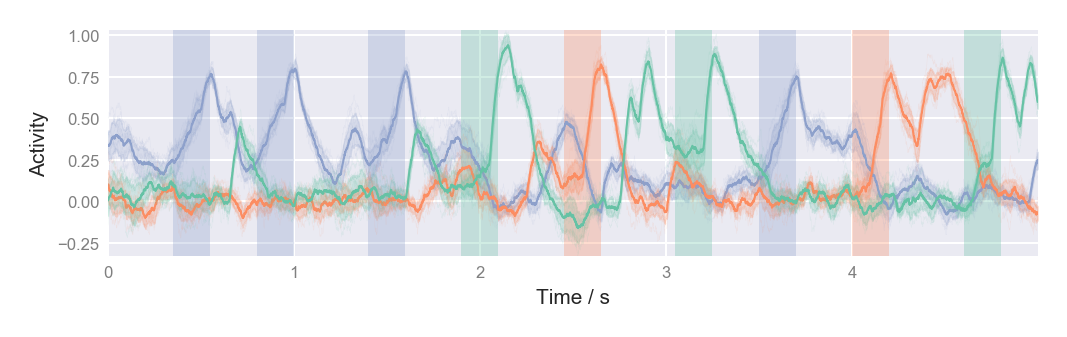

In [10]:
plotInputs(reservoirPair2.inputDict['test'],tend=5,saveName="asabuki3Inputs")
plotTest(reservoirPair2,testName='posttraining',testData='test',tend=5,colorOrders=[2,1,0],plotTrials=True,saveName="asabuki3z")

In [ ]:
# test low D dynamics of reservoir on chunks 
X = reservoirPair2.hist['test']['r'][:,:,0].T
X = X - np.mean(X,axis=0)
XX_T = np.matmul(X.T,X)
eigenvals, eigenvecs = np.linalg.eig(XX_T)
reducedX = np.matmul(X,eigenvecs[:,:2])